In [47]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('WineQT.csv')

In [49]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


<Axes: xlabel='alcohol', ylabel='Density'>

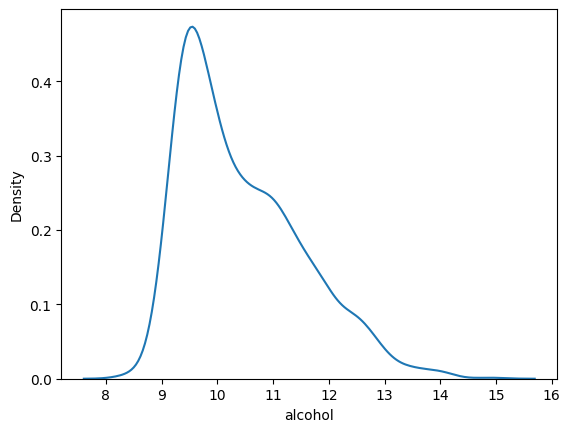

In [50]:
sb.kdeplot(df['alcohol'])

<Axes: xlabel='citric acid', ylabel='Density'>

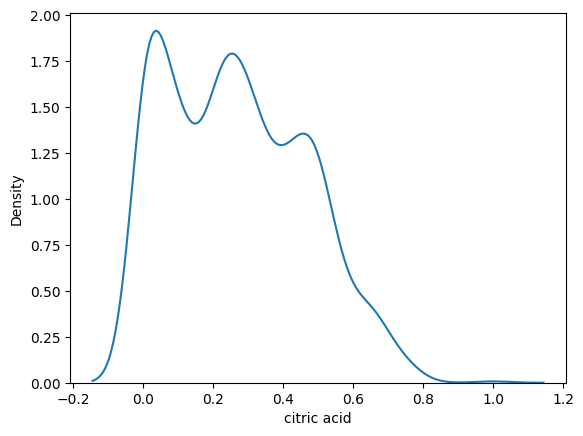

In [51]:
sb.kdeplot(df['citric acid'])

<Axes: xlabel='alcohol', ylabel='citric acid'>

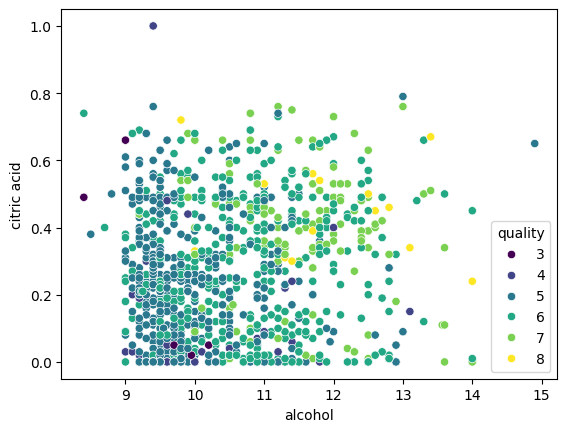

In [52]:

sb.scatterplot(x=df['alcohol'],y=df['citric acid'],hue=df['quality'],palette='viridis')

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('quality',axis=1),
                                                 df['quality'],
                                                 random_state=0,
                                                 test_size=0.3)
x_test.shape,x_train.shape


((343, 12), (800, 12))

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_scaledtest = scaler.fit_transform(x_test)
x_scaledtrain  = scaler.fit_transform(x_train)


In [57]:
x_scaledtrain = pd.DataFrame(x_scaledtrain,columns=x_train.columns)
x_scaledtest = pd.DataFrame(x_scaledtest,columns=x_test.columns)


In [58]:
np.round(x_train.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,8.3,0.5,0.3,2.5,0.1,15.3,46.2,1.0,3.3,0.6,10.5,788.1
std,1.8,0.2,0.2,1.3,0.0,10.0,32.8,0.0,0.2,0.2,1.1,467.9
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.9,0.3,8.4,0.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,376.8
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,768.5
75%,9.1,0.6,0.4,2.6,0.1,21.0,63.0,1.0,3.4,0.7,11.2,1199.2
max,15.9,1.3,0.8,15.5,0.4,68.0,289.0,1.0,4.0,2.0,14.9,1597.0


In [59]:
np.round(x_scaledtrain.describe(),1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0,800.0
mean,0.3,0.3,0.3,0.1,0.2,0.2,0.1,0.5,0.4,0.2,0.3,0.5
std,0.2,0.1,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.3
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.4,0.3,0.1,0.2,0.2
50%,0.3,0.3,0.3,0.1,0.2,0.2,0.1,0.5,0.4,0.2,0.3,0.5
75%,0.4,0.4,0.5,0.1,0.2,0.3,0.2,0.6,0.5,0.2,0.4,0.8
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


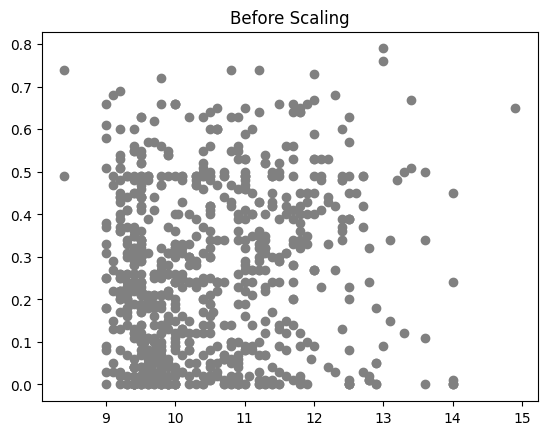

In [63]:
plt.title('Before Scaling')
plt.scatter(x_train['alcohol'],x_train['citric acid'],color='grey')

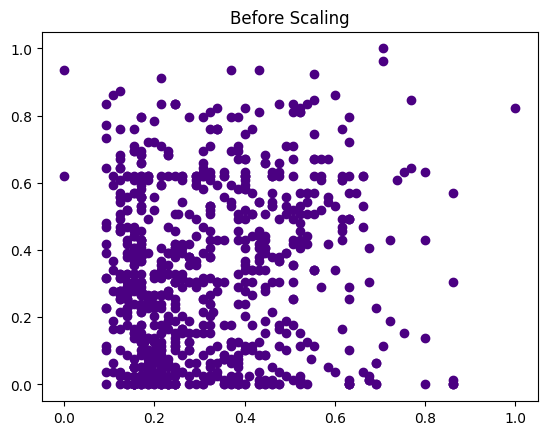

In [65]:
plt.title('Before Scaling')
plt.scatter(x_scaledtrain['alcohol'],x_scaledtrain['citric acid'],color='indigo')

<Axes: title={'center': 'Before scaling'}, xlabel='alcohol', ylabel='Density'>

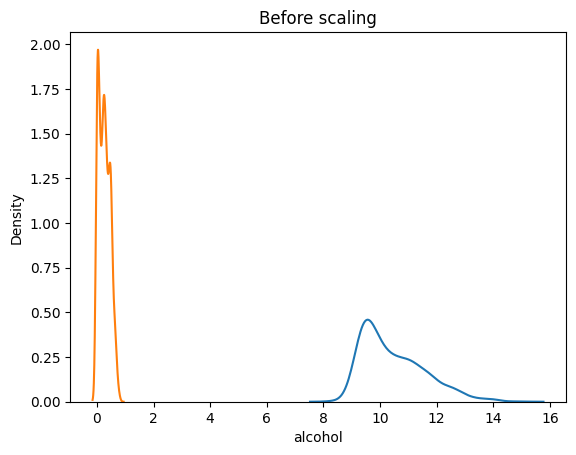

In [72]:
plt.title('Before scaling')
sb.kdeplot(x_train['alcohol'])
sb.kdeplot(x_train['citric acid'])

<Axes: title={'center': 'After scaling'}, xlabel='alcohol', ylabel='Density'>

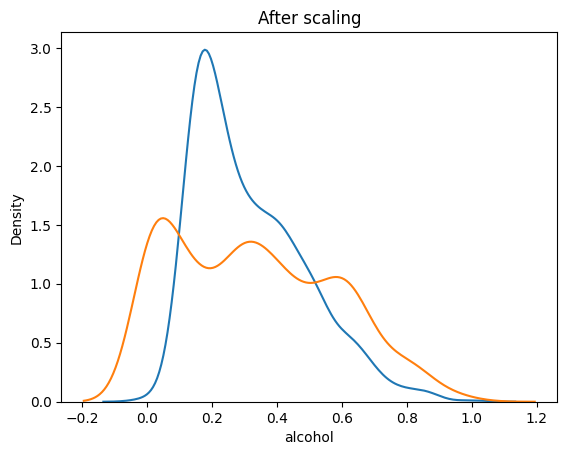

In [75]:
plt.title('After scaling')
sb.kdeplot(x_scaledtrain['alcohol'])
sb.kdeplot(x_scaledtrain['citric acid'])